In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models, callbacks
import os

In [4]:
# Dataset paths
dataset_path= "/content/drive/MyDrive/Colab Notebooks/KOA dataset/dataset KOA/archive"


In [5]:
# Create training and validation datasets
batch_size = 32
img_size = (224, 224)


In [7]:
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode="categorical",
    image_size=img_size,
    batch_size=batch_size
)

Found 9786 files belonging to 4 classes.
Using 7829 files for training.


In [8]:
val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode="categorical",
    image_size=img_size,
    batch_size=batch_size
)

Found 9786 files belonging to 4 classes.
Using 1957 files for validation.


In [9]:
# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [10]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [16]:
# CNN Model
num_classes = 4
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # This layer will output 4 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

In [19]:
# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 1875s 8s/step - accuracy: 0.5801 - loss: 1.1575 - val_accuracy: 0.5933 - val_loss: 1.1125 - learning_rate: 5.0000e-05
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.5872 - loss: 1.1476 - val_accuracy: 0.5933 - val_loss: 1.1115 - learning_rate: 5.0000e-05
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 30s 123ms/step - accuracy: 0.5869 - loss: 1.1429 - val_accuracy: 0.5933 - val_loss: 1.1102 - learning_rate: 5.0000e-05
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.5847 - loss: 1.1462 - val_accuracy: 0.5933 - val_loss: 1.1081 - learning_rate: 5.0000e-05
Epoch 5/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.5880 - loss: 1.1294 - val_accuracy: 0.5933 - val_loss: 1.1078 - learning_rate: 5.0000e-05
Epoch 6/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.5861 - loss: 1.1372 - val_accuracy: 0.5933 - val_loss: 1.1112 - learning_rate: 5.0000e-05
Epoch 7/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 37s 149

In [20]:
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc:.4f}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.5906 - loss: 1.1050
Validation Accuracy: 0.5933


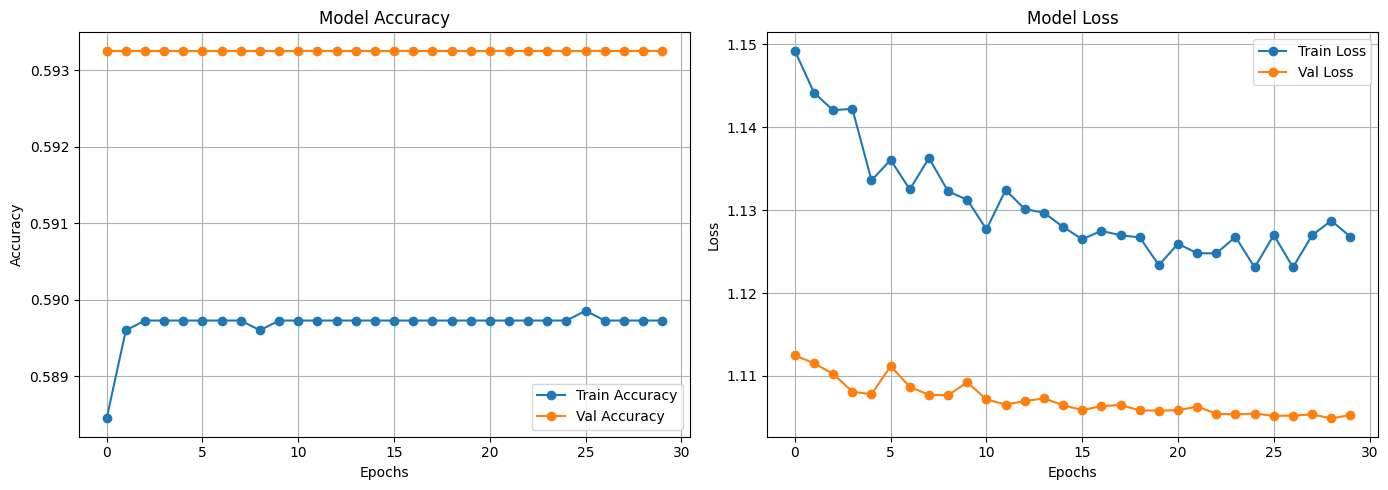

In [22]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
